In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
'''Function to load the dataset and show basic info:
first rows, missing values, duplicates, and data types'''

def check_data(file_path):
    data = pd.read_csv(file_path)
    print(f'First five rows:\n{data.head()}')
    print(f'Missing values:\n{data.isna().sum()}')
    print(f'Duplicates: {data.duplicated().sum()}')
    print(data.info())
    return data

data = check_data('/kaggle/input/cybersecurity-threat-detection/telesurgery_cybersecurity_dataset.csv')

'''The dataset is clean overall, with 1000 records and no duplicates.
All columns have complete data except for "Response Action Taken",
which has 283 missing values. The data types (numerical and categorical) 
are suitable for further preprocessing and analysis.'''

First five rows:
   Robot Gesture ID Gesture Type Gesture Coordinates (x, y, z)  \
0                10     Incision             (1.48, 1.4, 0.02)   
1                 8    Diagnosis            (1.62, 1.81, 0.68)   
2                 9     Incision            (0.67, 1.53, 0.06)   
3                 1     Incision            (1.63, 1.74, 1.92)   
4                 4     Suturing            (0.53, 0.87, 1.17)   

             Timestamp  Gesture Duration (sec) Robot Status  Message ID  \
0  2025-02-14 16:32:27                    4.37         Idle       22614   
1  2025-02-14 16:32:27                    3.08         Idle       61556   
2  2025-02-14 16:32:27                    1.11       Active       27848   
3  2025-02-14 16:32:27                    2.72         Idle       60592   
4  2025-02-14 16:32:27                    1.20         Idle       46712   

     Sender  Receiver Encryption Algorithm Used Encryption Status  \
0  Operator     Robot                  Two Fish         Encrypted 

'The dataset is clean overall, with 1000 records and no duplicates.\nAll columns have complete data except for "Response Action Taken",\nwhich has 283 missing values. The data types (numerical and categorical) \nare suitable for further preprocessing and analysis.'

In [3]:
'''Function to clean and preprocess the data:
-Splits gesture coordinates into x, y, z
-Converts data types to float
-Drops unnecessary columns
-Extracts date and time features from the timestamp'''

def clean_data(data):
    data[['x', 'y', 'z']] = data['Gesture Coordinates (x, y, z)'].str.split(',', expand=True)
    data[['x', 'y', 'z']] = data[['x', 'y', 'z']].applymap(lambda i : i.strip('()'))
    data[['Gesture Duration (sec)','Response Time (sec)','x','y','z']] = data[['Gesture Duration (sec)','Response Time (sec)','x','y','z']].astype('float')
    data = data.drop(['Robot Gesture ID','Message ID','Gesture Coordinates (x, y, z)','Encryption Algorithm Used'], axis=1)

    data['Timestamp'] = pd.to_datetime(data['Timestamp'])

    data['hour'] = data['Timestamp'].dt.hour
    data['minute'] = data['Timestamp'].dt.minute
    data['day'] = data['Timestamp'].dt.day
    data['month'] = data['Timestamp'].dt.month
    data['year'] = data['Timestamp'].dt.year

    data = data.drop(['Timestamp'], axis=1)

    for i in ['hour', 'minute', 'day', 'month', 'year']:
        data[i] = data[i].astype(int)

    print(data.info())
    return data

cleaning_data = clean_data(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gesture Type               1000 non-null   object 
 1   Gesture Duration (sec)     1000 non-null   float64
 2   Robot Status               1000 non-null   object 
 3   Sender                     1000 non-null   object 
 4   Receiver                   1000 non-null   object 
 5   Encryption Status          1000 non-null   object 
 6   Network Latency (ms)       1000 non-null   int64  
 7   Data Transfer Rate (Mbps)  1000 non-null   int64  
 8   Threat Type                1000 non-null   object 
 9   Threat Severity            1000 non-null   object 
 10  Response Time (sec)        1000 non-null   float64
 11  Response Action Taken      717 non-null    object 
 12  Threat Detected            1000 non-null   int64  
 13  x                          1000 non-null   float6

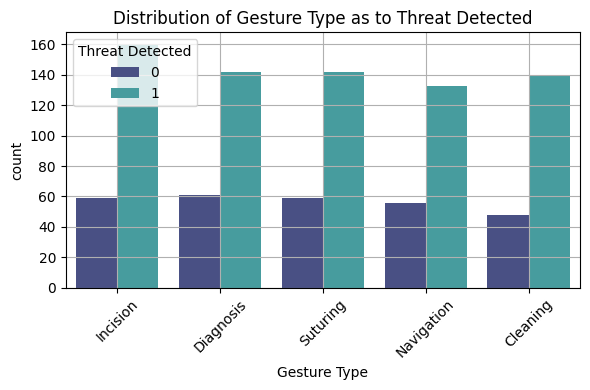

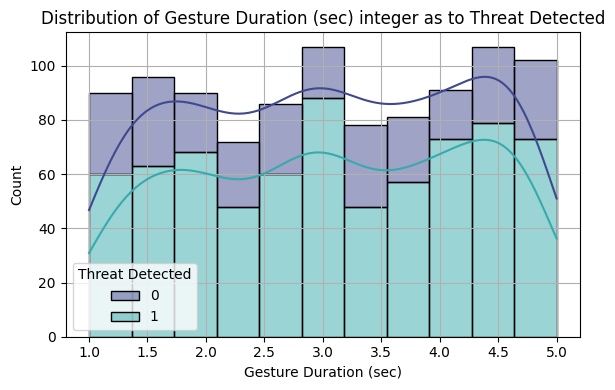

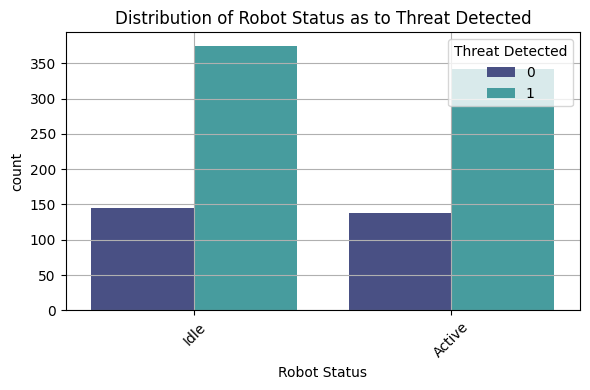

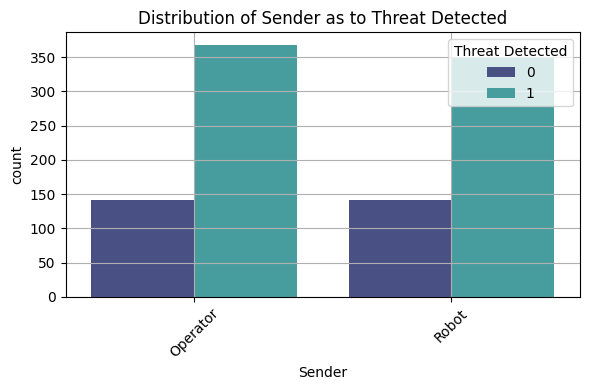

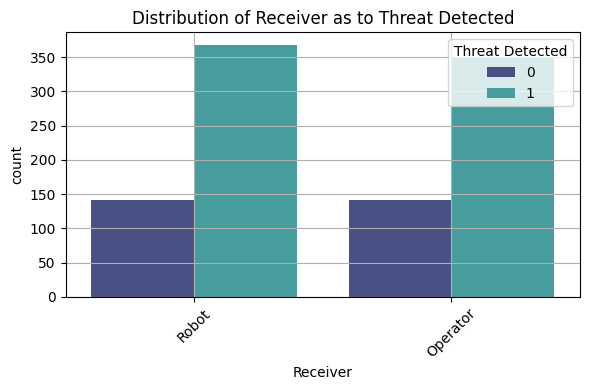

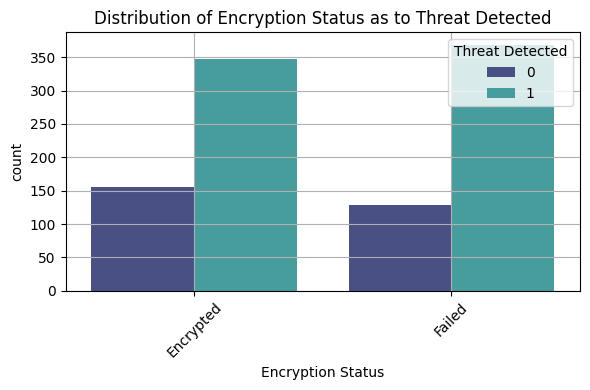

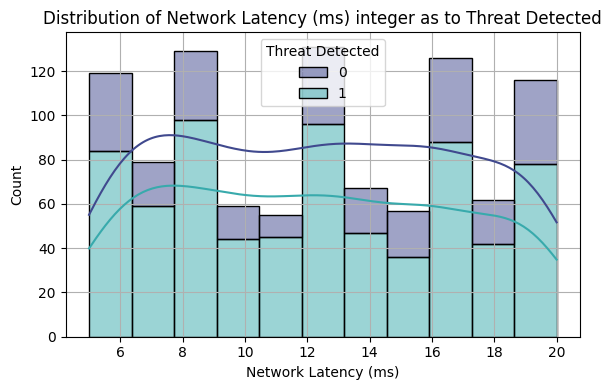

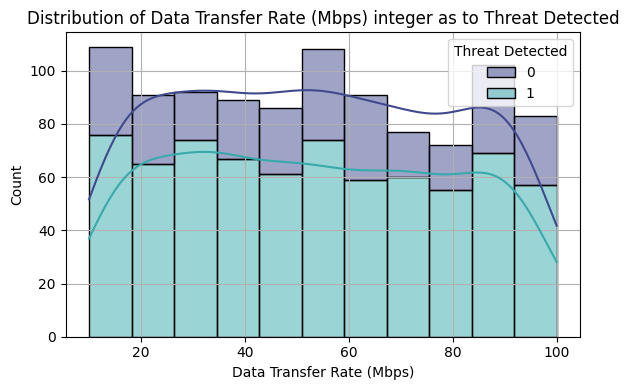

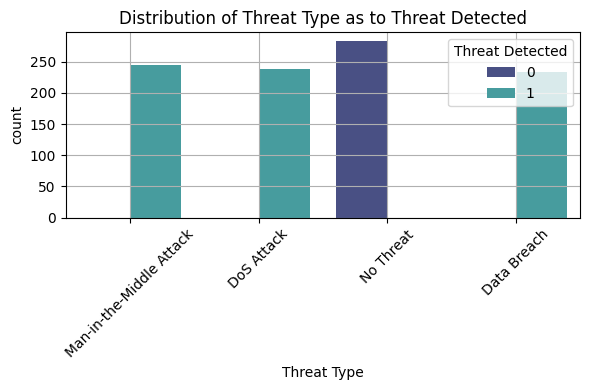

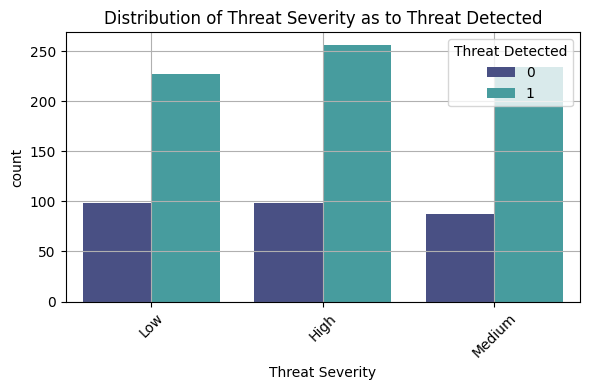

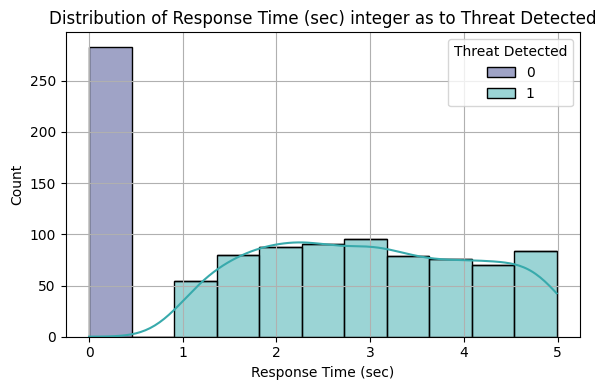

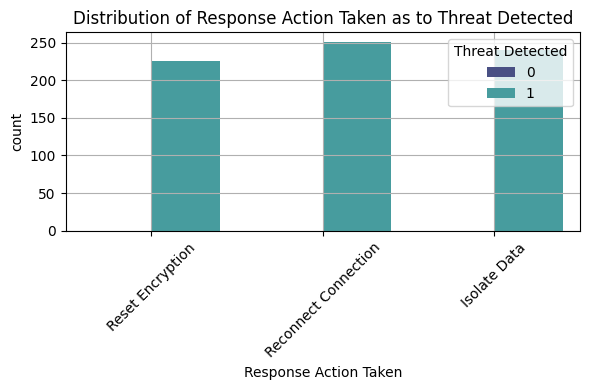

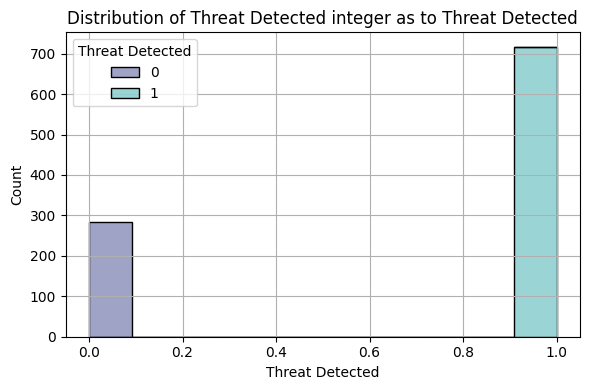

'Visualizations were created to show how the values of the "Threat Detected" \nvariable are distributed across other categorical and numerical variables.\n\nThe charts reveal that the majority of the records are associated with the presence of a threat,\nand in many cases, clear differences can be observed in the distribution \nbetween records with and without a detected threat.\n\n'

In [4]:
'''-Plot the distribution of each feature in relation to "Τhreat Detected"
-Uses count plots for categorical data and histograms for numerical data'''


columns_with_threat_detected = [i for i in ['Gesture Type', 'Gesture Duration (sec)', 'Robot Status', 'Sender',
       'Receiver', 'Encryption Status', 'Network Latency (ms)',
       'Data Transfer Rate (Mbps)', 'Threat Type', 'Threat Severity',
       'Response Time (sec)', 'Response Action Taken','Threat Detected']]

for i in columns_with_threat_detected:
    plt.figure(figsize=(6, 4))

    if cleaning_data[i].dtype == 'object':
        sns.countplot(data=cleaning_data, x=i, hue='Threat Detected',palette='mako')
        plt.title(f'Distribution of {i} as to Threat Detected')
        plt.xticks(rotation=45)

    else:
        sns.histplot(data=cleaning_data, x=i, hue='Threat Detected', kde=True, multiple='stack',palette='mako')
        plt.title(f'Distribution of {i} integer as to Threat Detected')

    plt.tight_layout()
    plt.grid(True)
    plt.show()


'''Visualizations were created to show how the values of the "Threat Detected" 
variable are distributed across other categorical and numerical variables.

The charts reveal that the majority of the records are associated with the presence of a threat,
and in many cases, clear differences can be observed in the distribution 
between records with and without a detected threat.

'''

In [5]:
'''Display all categorical columns and their unique values'''

object_column = [i for i in cleaning_data if cleaning_data[i].dtype == 'object']
for i in object_column:
    print(i,':' ,cleaning_data[i].unique())

Gesture Type : ['Incision' 'Diagnosis' 'Suturing' 'Navigation' 'Cleaning']
Robot Status : ['Idle' 'Active']
Sender : ['Operator' 'Robot']
Receiver : ['Robot' 'Operator']
Encryption Status : ['Encrypted' 'Failed']
Threat Type : ['Man-in-the-Middle Attack' 'DoS Attack' 'No Threat' 'Data Breach']
Threat Severity : ['Low' 'High' 'Medium']
Response Action Taken : ['Reset Encryption' nan 'Reconnect Connection' 'Isolate Data']


In [6]:
'''Group data by 'Threat Detected' and calculate mean values (or counts) 
for selected features to compare threat and non-threat cases
'''

cleaning_data.groupby(['Threat Detected']).agg({
    'Gesture Duration (sec)': 'mean',
    'Network Latency (ms)': 'mean',
    'Sender': 'count',
    'Response Action Taken': 'count',
    'x': 'mean',
    'y': 'mean',
    'z': 'mean',
    'hour' : 'mean',
    'minute' : 'mean',
    'day' : 'mean',
    'month' : 'mean',
    'year' : 'mean',
    'Data Transfer Rate (Mbps)' : 'mean'})

,Gesture Duration (sec),Network Latency (ms),Sender,Response Action Taken,x,y,z,hour,minute,day,month,year,Data Transfer Rate (Mbps)
Threat Detected,,,,,,,,,,,,,
0,2.962226,12.798587,283,0,1.068410,1.009081,0.967208,16.0,32.0,14.0,2.0,2025.0,54.809187
1,3.073626,12.213389,717,717,0.994658,1.013264,0.993529,16.0,32.0,14.0,2.0,2025.0,53.252441


In [7]:
'''Import necessary libraries for preprocessing, modeling, evaluation, 
and explainability (using Shap) with XGBoost
'''

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay,f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix ,precision_score, recall_score, roc_auc_score
import numpy as np
import shap
from sklearn.metrics import precision_recall_curve

In [8]:
'''This function cleans and prepares the data for analysis or machine learning.
-It adds new columns based on existing ones (like x², y², z²).
-It turns text values (like 'Idle' or 'Active') into numbers so that the computer can use them.
-It also calculates useful things, like how fast a gesture was and how strong it was.'''

def preproc_data(data):

    data['x2'] = data['x'] ** 2
    data['y2'] = data['y'] ** 2
    data['z2'] = data['z'] ** 2

    data = pd.get_dummies(
        data,
        columns=[
            'Gesture Type'],
        drop_first=True
    )

    data['Robot Status'] = data['Robot Status'].replace({'Idle': 0, 'Active': 1}).fillna(0).astype(int)
    data['Sender'] = data['Sender'].replace({'Operator': 0, 'Robot': 1}).fillna(0).astype(int)
    data['Receiver'] = data['Receiver'].replace({'Robot': 1, 'Operator': 0}).fillna(0).astype(int)
    data['Encryption Status'] = data['Encryption Status'].replace({'Encrypted': 0, 'Failed': 1}).fillna(0).astype(int)

    data['duration_latency_ratio'] = data['Gesture Duration (sec)'] / (data['Network Latency (ms)'] + 1)

    data['gesture_magnitude'] = (data['x']**2 + data['y']**2 + data['z']**2)**0.5
    data['gesture_speed'] = data['gesture_magnitude'] / (data['Gesture Duration (sec)'] + 1e-6)



    return data

f1 score per fold: [0.59701493 0.61666667 0.60606061 0.73913043 0.65671642 0.68181818
 0.68656716 0.62295082 0.5785124  0.69767442]
Mean scores: 0.6483112031761749
                    Feature  Importance
17                       z2    0.062097
0    Gesture Duration (sec)    0.059077
18   Gesture Type_Diagnosis    0.056748
16                       y2    0.056567
22   duration_latency_ratio    0.055851
8                         y    0.055547
20  Gesture Type_Navigation    0.055521
3                  Receiver    0.055275
4         Encryption Status    0.053618
24            gesture_speed    0.053446

 Evaluation on Train Set 
[[172  54]
 [167 407]]
              precision    recall  f1-score   support

           0       0.51      0.76      0.61       226
           1       0.88      0.71      0.79       574

    accuracy                           0.72       800
   macro avg       0.70      0.74      0.70       800
weighted avg       0.78      0.72      0.74       800

Precision: 0.882863

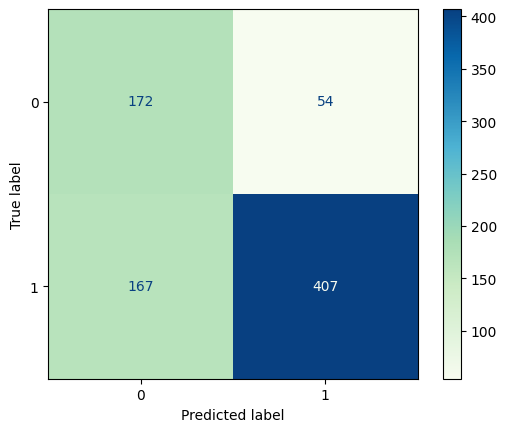

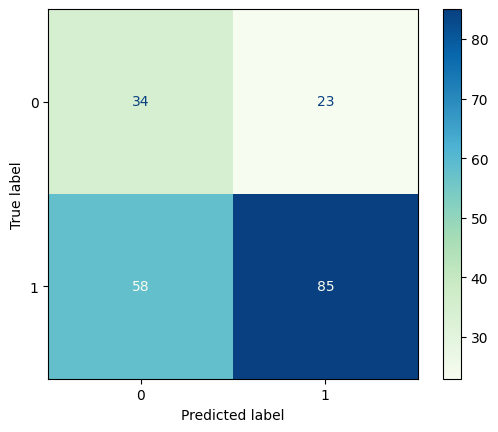

In [9]:
'''This code builds and evaluates a machine learning model to predict if a threat was detected.
It first removes columns we don’t want to use for prediction.
Then it creates a pipeline that:
-Applies custom preprocessing to the data (e.g., creates new features).
-Trains an XGBoost classifier with specific settings to handle class imbalance.
It uses cross-validation to check model performance (F1 score).
Then it splits the data into training and test sets, trains the model, and shows:
-Which features were most important
-How well the model performs on both training and test sets using precision, recall, F1 score, and ROC AUC
-Confusion matrices to visualize correct and incorrect predictions'''


preprocessing_data = FunctionTransformer(preproc_data)

x_ = cleaning_data.drop([
    'Threat Detected',
    'Threat Severity',
    'Response Action Taken',
    'Response Time (sec)',
    'Threat Type'
],
    axis=1)
y_ = cleaning_data['Threat Detected']


pipeline = Pipeline(steps=[
    ('custom_preprocessing', preprocessing_data),
    ('classifier', XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc',
    max_depth=3,
    learning_rate=0.01,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=0.39,
    gamma= 0.1))
])


cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=60)
scores = cross_val_score(pipeline, x_, y_, cv=cross_val, scoring='f1')

print('f1 score per fold:', scores)
print('Mean scores:', scores.mean())

X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, stratify=y_, random_state=42)

pipeline.fit(X_train, y_train)

model = pipeline.named_steps['classifier']

feature_names = pipeline.named_steps['custom_preprocessing'].transform(X_train).columns

importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))

print('\n Evaluation on Train Set ')
y_train_pred = pipeline.predict(X_train)

print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred))
print('Recall:', recall_score(y_train, y_train_pred))
print('Roc auc:', roc_auc_score(y_train, y_train_pred))

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, cmap='GnBu')

y_test_pred = pipeline.predict(X_test)

print('\n Evaluation on Test Set ')
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


print('Precision:', precision_score(y_test, y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('ROC AUC:', roc_auc_score(y_test, y_test_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='GnBu')

Shap Beeswarm Plot:


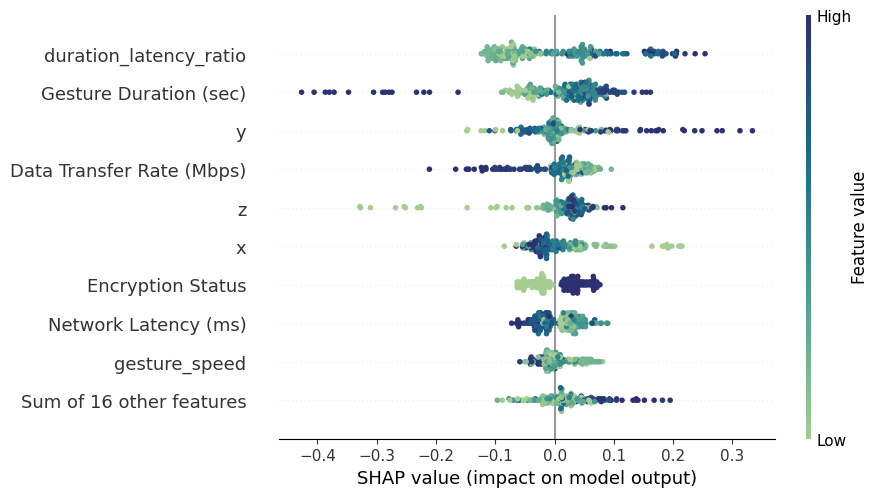

In [10]:
'''Use Shap to explain how each feature influences the model's predictions on the test set.
The beeswarm plot shows the most important features and their impact.'''

X_test_preproc = pipeline.named_steps['custom_preprocessing'].transform(X_test)
X_test_preproc = pd.DataFrame(X_test_preproc, columns=feature_names)

explainer = shap.Explainer(model)
shap_values = explainer(X_test_preproc)

print('Shap Beeswarm Plot:')
mako_cmap = sns.color_palette('crest', as_cmap=True)

shap.plots.beeswarm(shap_values, color=mako_cmap)